In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [20]:
general_df = pd.read_csv('../data_export/var_grad_program_cleaned.csv')
school_df = pd.read_csv('../data_export/school_clean.csv')

In [21]:
general_df = general_df.drop(columns=['Unnamed: 0']).rename(columns={
    'SCHOOL_DSTRCT_CD':'School District Code'
})

In [110]:
merged_df = pd.merge(school_df,general_df, on = 'School District Code', how = 'inner')
merged_df

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent,LABEL_LVL_1_DESC,PROGRAM_TOTAL,PROGRAM_PERCENT,TOTAL_COUNT
0,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.6,Grad Rate -ALL Students,220.0,90.16,244.0
1,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.6,Grad Rate -Black,54.0,96.43,56.0
2,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.6,Grad Rate -Economically Disadvantaged,220.0,90.53,243.0
3,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.6,Grad Rate -Female,110.0,90.91,121.0
4,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.6,Grad Rate -Hispanic,29.0,93.55,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1814,2017,891,Department of Juvenile Justice,ALL,All Schools,20.0,10.0,50.0,Grad Rate -ALL Students,23.0,12.92,178.0
1815,2017,891,Department of Juvenile Justice,ALL,All Schools,20.0,10.0,50.0,Grad Rate -Black,16.0,11.43,140.0
1816,2017,891,Department of Juvenile Justice,ALL,All Schools,20.0,10.0,50.0,Grad Rate -Male,18.0,10.91,165.0
1817,2017,891,Department of Juvenile Justice,ALL,All Schools,20.0,10.0,50.0,Grad Rate -Not Economically Disadvantaged,20.0,14.30,140.0


In [92]:
desc_list = merged_df['LABEL_LVL_1_DESC'].unique()
desc_list = desc_list[1:]


In [109]:
# df_graph = merged_df.loc[merged_df['LABEL_LVL_1_DESC'] == desc_list[0]]
# # df_graph = df_graph.sort_values('PROGRAM_PERCENT', ascending = False)
# # df_graph = df_graph.loc[df_graph['PROGRAM_PERCENT'] != df_graph['PROGRAM_PERCENT'].min()]
# # df_graph = boston_df_o[(z < 3).all(axis=1)]
# # df_graph.plot.line(x = 'PROGRAM_PERCENT', y = 'Percent')

def graph_percent(df, description,indicator):
    df_graph = df.loc[merged_df['LABEL_LVL_1_DESC'] == description]
    z = (stats.zscore(df_graph.loc[:,indicator]))
    df_graph.loc[:,(f'{description}_zscore')] = z
    df_clean = df_graph.loc[(df_graph[f'{description}_zscore']<3) & (df_graph[f'{description}_zscore']>-3)]
    df_clean.sort_values(indicator, ascending = False).plot.scatter(x = indicator, y = 'Percent')
    x_values = df_clean[indicator]
    y_values = df_clean['Percent']
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)
    plt.plot(x_values, regress_values)
    plt.title(f'{description} vs Percent Enrollment')
    plt.ylabel(f'Percent Enrollment')
    print(f'p-value: {pvalue}, std error: {stderr}')


# from sklearn import preprocessing
# df_graph
# x = df_graph[['PROGRAM_PERCENT','Percent']].values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# x_scaled
# df_graph.loc[:,['Program_percent_scaled','Percent_scaled']] = x_scaled
# df_graph.sort_values('Program_percent_scaled', ascending = False).plot.line(x ='Program_percent_scaled', y= 'Percent_scaled' )

C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

y = -0.03x +65.91
p-value: 0.7657679773231588, std error: 0.11504430474359383
y = 0.03x +60.31
p-value: 0.7945831011706673, std error: 0.10996529922563425
y = 0.41x +25.41
p-value: 0.004120167296566586, std error: 0.14129324432323465
y = -0.03x +65.78
p-value: 0.7682272431743145, std error: 0.10211295813643372
y = 0.23x +43.47
p-value: 0.0160318859665274, std error: 0.09296952380832074
y = -0.32x +84.77
p-value: 0.09641239883125552, std error: 0.14699572553387502
y = -0.06x +66.8


C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

p-value: 0.4406211669223806, std error: 0.07469657768847532
y = 0.34x +32.09
p-value: 0.003697241381514652, std error: 0.11617214268206194
y = 0.53x +15.68
p-value: 8.178721739665451e-07, std error: 0.10402172854847642
y = 0.4x +27.66
p-value: 0.02824121815365792, std error: 0.18017470100193939
y = 0.03x +64.56
p-value: 0.9048837129408589, std error: 0.2084344266168947
y = -0.23x +81.69
p-value: 0.008162338239640075, std error: 0.08550778984924792


C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

y = -0.13x +75.41
p-value: 0.15193649472562729, std error: 0.08866621695248776
y = 0.14x +53.71
p-value: 0.4067415055673127, std error: 0.16307099372441675
y = -0.03x +69.59
p-value: 0.9322336370757015, std error: 0.30867343505794836
y = 0.09x +68.37
p-value: 0.8121186578834515, std error: 0.3292570534345423


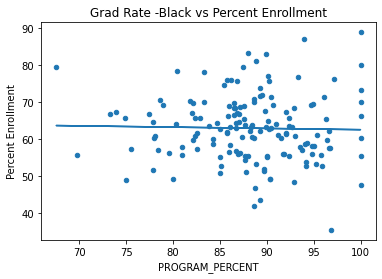

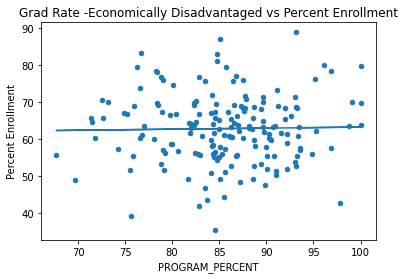

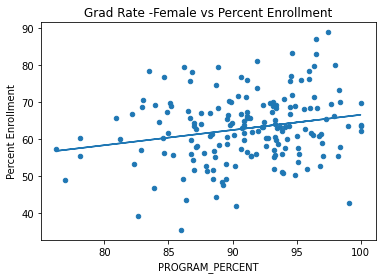

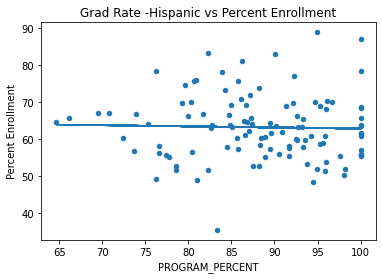

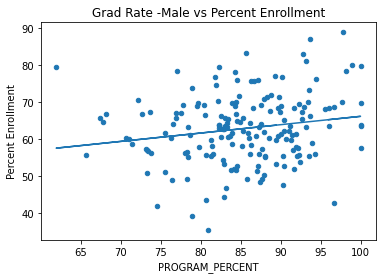

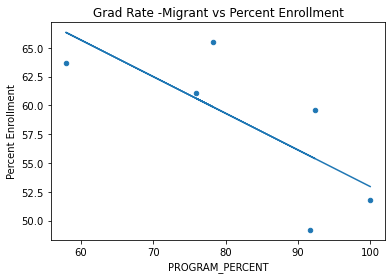

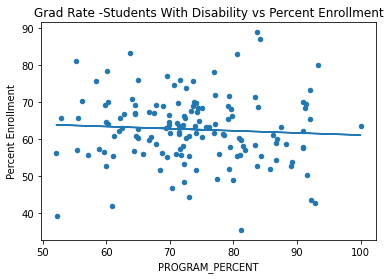

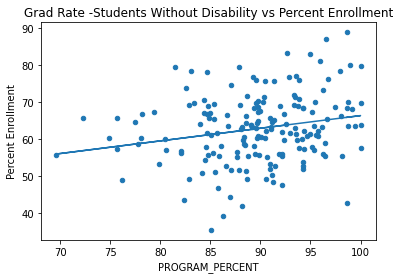

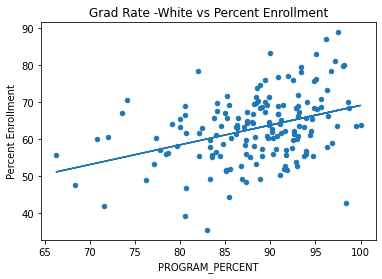

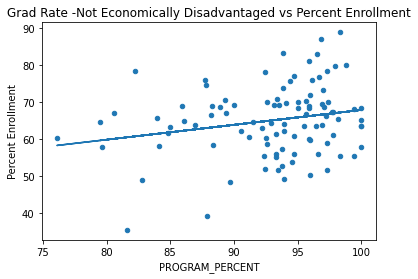

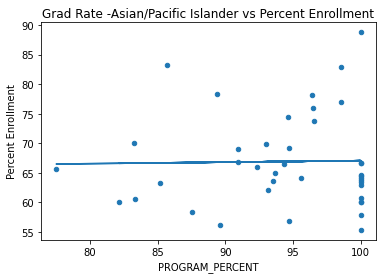

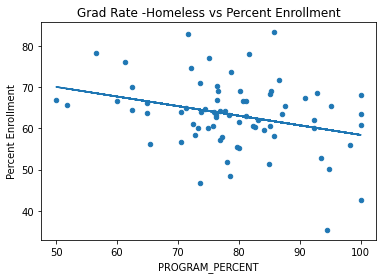

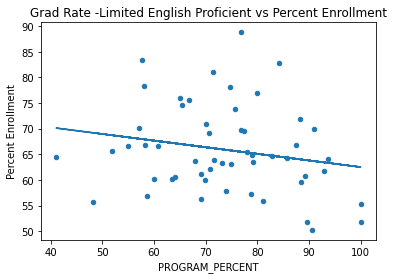

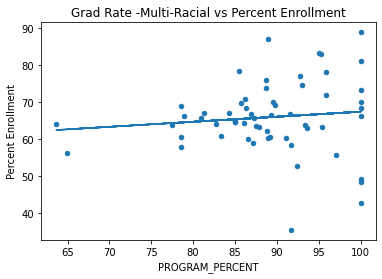

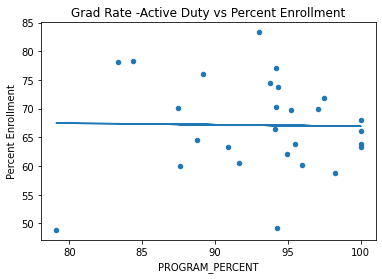

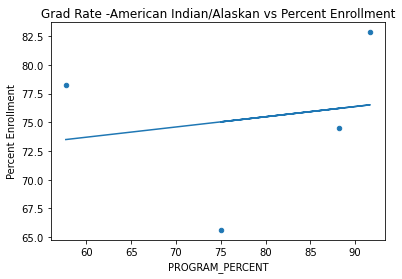

In [111]:
for description in desc_list:
    graph_percent(merged_df,description,'PROGRAM_PERCENT')

In [112]:
merged_df = pd.merge(school_df,general_df, on = 'School District Code', how = 'inner')

C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

y = 0.03x +60.26
p-value: 0.002058997250279969, std error: 0.009264324871146163
y = -0.01x +63.51
p-value: 0.42469795179408276, std error: 0.007356056395796708
y = 0.03x +58.84
p-value: 0.00018793172109807742, std error: 0.0075889835963032235
y = 0.05x +60.53
p-value: 0.012653087734418552, std error: 0.021655449925663012
y = 0.03x +58.62
p-value: 0.00031264359240668006, std error: 0.008470123801251065


C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

y = 0.63x +50.0
p-value: 0.27015328246264386, std error: 0.4907283471086771
y = 0.12x +58.97
p-value: 0.015770176521540717, std error: 0.04937471806410221
y = 0.02x +58.58
p-value: 0.00017778572639503477, std error: 0.0044987135257197304
y = 0.03x +59.22
p-value: 0.0007081662939139688, std error: 0.007360406553049363
y = 0.03x +58.45
p-value: 2.1034776165900694e-06, std error: 0.006438600837112239
y = 0.15x +62.08
p-value: 0.0026803275861941827, std error: 0.04756976472603251
y = 0.06x +61.95
p-value: 0.5409766507524982, std error: 0.09748526764975247
y = 0.11x +63.58
p-value: 0.2564377041683484, std error: 0.09279336040605325
y = 0.41x +57.0
p-value: 0.006986323576671358, std error: 0.14668651402866428
y = -0.03x +68.42
p-value: 0.5086240993045081, std error: 0.049368166986921154
y = -0.08x +76.33
p-value: 0.9785978735485947, std error: 2.5065096333545545


C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

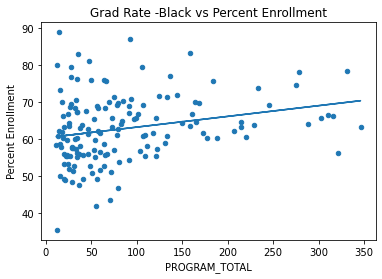

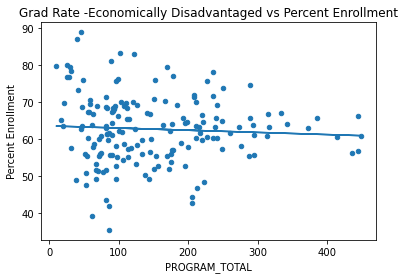

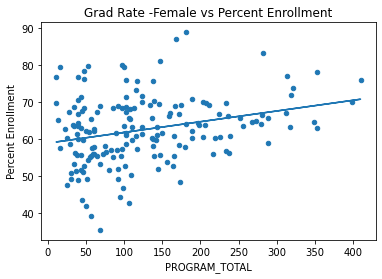

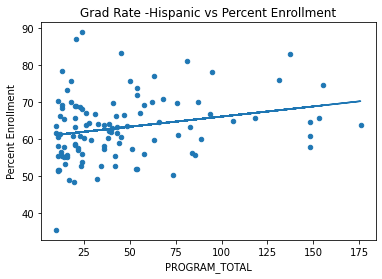

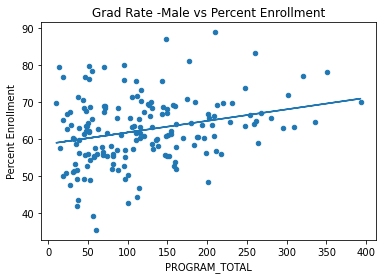

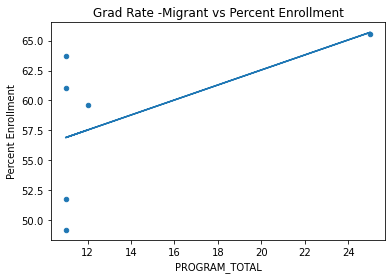

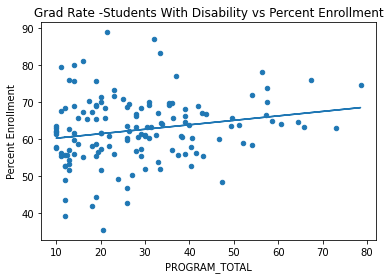

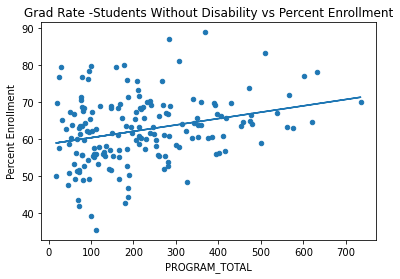

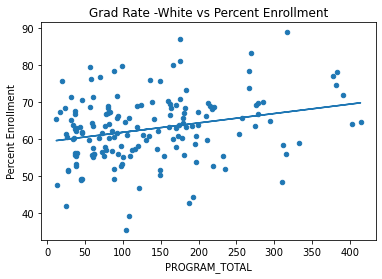

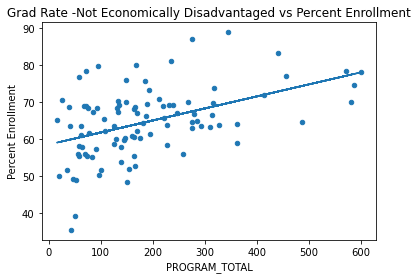

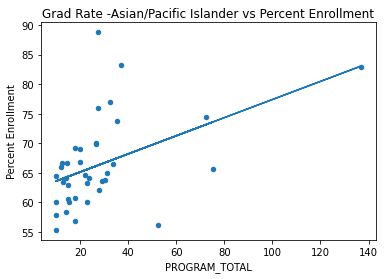

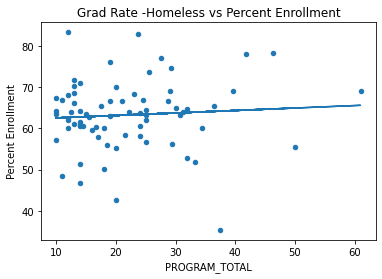

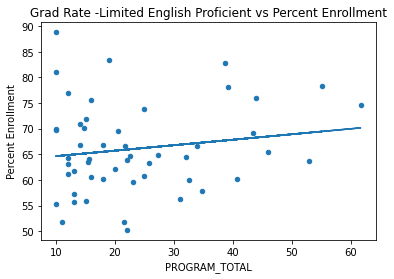

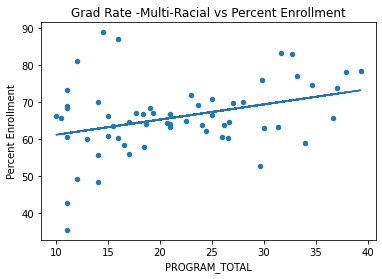

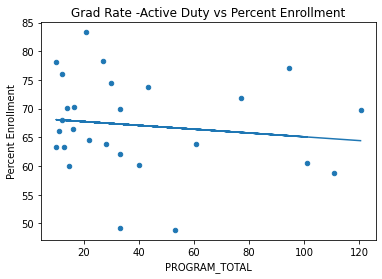

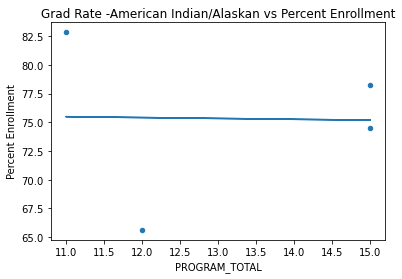

In [113]:
for description in desc_list:
    graph_percent(merged_df,description,'PROGRAM_TOTAL')